<a href="https://colab.research.google.com/github/darshil8008/Cartoonify-Image/blob/main/Cartoonify_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#defining a function for reading file
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #converting color to rgb from bgr as usually the color format is bgr
  plt.imshow(img)
  plt.show()
  return img

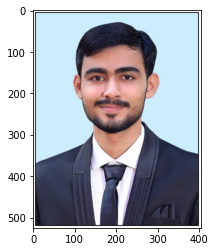

In [ ]:
filename = "/content/passport_photo.jpg"
img = read_file(filename)

In [ ]:
#using adaptive threshold for edge mask 
def edge_mask(img,line_size,blur_value):
  #output edges of images
  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) #input image 
  gray_blur = cv2.medianBlur(gray,blur_value)

  edges = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
  #output edges of images
  return edges

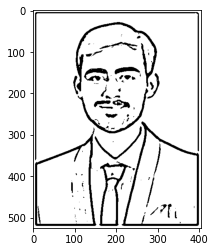

In [ ]:
line_size,blur_value = 11,7   #we can play with line size and blur value also 
edges = edge_mask(img,line_size,blur_value)

plt.imshow(edges,cmap ="gray")              #gray or binary 
plt.show()

In [ ]:
#reduce the colour palette 
def color_quantization(img , k):

  #transform the image
  data = np.float32(img).reshape((-1,3))

  #determine criteria 
  criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

  # implementing k-means #k clusters are formed randomly
  ret , label , center = cv2.kmeans( data, k, None , criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)

  result = center[label.flatten()]
  result = result.reshape(img.shape)

  return result

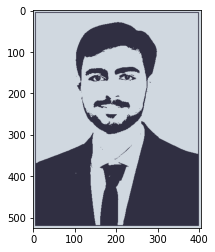

In [ ]:
img = color_quantization(img , k=8) #k no of colors 

plt.imshow(img)              
plt.show()

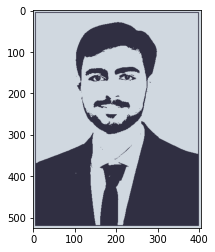

In [ ]:
#reduce the noise the image will get a little bit blurred up
blurred = cv2.bilateralFilter(img,d=7,sigmaColor = 200,sigmaSpace = 200) #d is diameter of each pixel

plt.imshow(img)              
plt.show()

In [ ]:
#combine edge mask with the quantiz img 
def cartoon():
  c = cv2.bitwise_and(blurred,blurred,mask = edges)
  
  plt.imshow(c)
  plt.title("CARTOONIFIED IMG")
  plt.show()

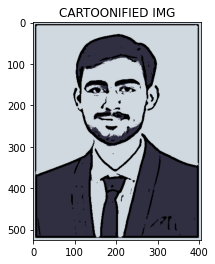

In [ ]:
cartoon()